<a href="https://colab.research.google.com/github/LDIAZAP/TRABAJO-DE-RED-NEURONAL/blob/main/Entrenamiento_de_una_red_neuronal_GRUPO_Piero_Pereira_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A. IMPLEMENTANDO UNA RED NEURONAL**

# **El Tensor**

In [13]:
import tensorflow as tf

#Crear tensores
tensor_esc = tf.constant(42) #Escalar
tensor_vec = tf.constant([1, 2,3]) #Vector
tensor_mat = tf.constant([[1, 2], [3, 4]]) #Matriz

print("Escalar: ", tensor_esc.numpy())
print("Vector: ", tensor_vec.numpy())
print("Matriz:\n ", tensor_mat.numpy())

Escalar:  42
Vector:  [1 2 3]
Matriz:
  [[1 2]
 [3 4]]


# **Operaciones con tensores**

In [34]:
#Operaciones básicas con tensores
tensor_sum=tf.add(tensor_vec,tensor_vec)
tensor_prod=tf.matmul(tensor_mat,tensor_mat)

print("Suma de Tensores:", tensor_sum.numpy())
print("Producto punto entre matrices:\n", tensor_prod.numpy())

Suma de Tensores: [2 4 6]
Producto punto entre matrices:
 [[ 7 10]
 [15 22]]


# **Manejo de datasets con tensorflow**

In [14]:
#Crear un dataset simple ejemplo
train_dataset = tf.data.Dataset.from_tensor_slices((tensor_vec, tensor_vec))
train_dataset = train_dataset.shuffle(buffer_size= 1024).batch(2)

#Mostrar algunos ejemplos
for x, y in train_dataset.take(1):
  print(f"Entrada: {x.numpy()}, Etiqueta: {y.numpy()}")

Entrada: [2 3], Etiqueta: [2 3]


#**Usando la GPU DE tensorflow**

In [15]:
#verificar si tensorflow esta usando la GPU
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
import numpy as np

#Simulacion de una red con una capa
def simple_neuron(imput_data, wwright, bias):
  z = np.dot(imput_data, weight) + bias
  return np.maxinum(0, z) #funcion ReLu

# **1. RED NUEURONAL PARA CLASIFICACION CON MINIST**

In [1]:
#Cargar y normalizar el dataset MINIST
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
#Crear el modelo con Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential ([
    Flatten(input_shape =(28, 28)), #Aplazar las imágenes
    Dense(128, activation ='relu'), #Capa Oculta
    Dense(10) #Capa de salida con 10 clases
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [17]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
#Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8769 - loss: 0.4370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.1200
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9818 - loss: 0.0587
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0440


**1.2. Evaluacion de modelo**

In [32]:
#Evaluar el Modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9726 - loss: 0.0879
Precisión en el conjunto de prueba: 0.972599983215332


# **2. LIMITACIONES DE LAS ANN EN IMAGENES**

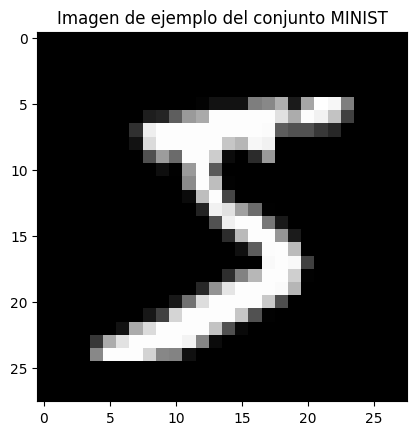

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediccion para la imagen aplanada: 5


In [29]:
#Ver como una red neuronal trata cada pixel de manera individual
import matplotlib.pyplot as plt

#Mostrar una imagen del dataset MINIST
plt.imshow(x_train[0], cmap='gray')
plt.title("Imagen de ejemplo del conjunto MINIST")
plt.show()

#Aplazar la imagen y pasarla por la red (sin considerar la estructura espacial)
prediction = model.predict(x_train[0].reshape(1, 28, 28))
print("Prediccion para la imagen aplanada:", prediction.argmax())

In [30]:
#Ver como el aplanamiento pierde la estructura de la imagen
flattened_image = x_train[0].reshape(-1)
print("Imagen aplanada(primeros 200 valores):", flattened_image[:200])

Imagen aplanada(primeros 200 valores): [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.   